# Question 4:
>	Which states have the biggest job market?

>	Which cities have the biggest job market? 

>	Have these changed over time(2008-2015)? 

>	Now contrast with pay. Which city or state has the biggest job market and greatest overall salary? (i.e. what's the best place to find well-paying work?)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('salary_data_states.xlsx')

In [3]:
df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE',
       'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED',
       'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED',
       'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY',
       'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED',
       'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS',
       'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE',
       'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_STATE_ABBREVIATION',
       'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS',
       'PREVAILING_WAGE_PER_YEAR', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP',
       'order'],
      dtype='object')

In [4]:
df.isna().sum()

CASE_NUMBER                            0
CASE_STATUS                            0
CASE_RECEIVED_DATE                     0
DECISION_DATE                          0
EMPLOYER_NAME                          0
PREVAILING_WAGE_SUBMITTED              0
PREVAILING_WAGE_SUBMITTED_UNIT         0
PAID_WAGE_SUBMITTED                    0
PAID_WAGE_SUBMITTED_UNIT               0
JOB_TITLE                              0
WORK_CITY                              3
EDUCATION_LEVEL_REQUIRED          156185
COLLEGE_MAJOR_REQUIRED            156227
EXPERIENCE_REQUIRED_Y_N           156185
EXPERIENCE_REQUIRED_NUM_MONTHS    162313
COUNTRY_OF_CITIZENSHIP            156185
PREVAILING_WAGE_SOC_CODE               0
PREVAILING_WAGE_SOC_TITLE              0
WORK_STATE                             0
WORK_STATE_ABBREVIATION                0
WORK_POSTAL_CODE                  113604
FULL_TIME_POSITION_Y_N             11093
VISA_CLASS                             0
PREVAILING_WAGE_PER_YEAR              68
PAID_WAGE_PER_YE

To answer our questions, we will need the "WORK_STATE_ABBREVIATION", "WORK_CITY", "PAID_WAGE_SUBMITTED", "DECISION_DATE", "PAID_WAGE_PER_YEAR", and "JOB_TITLE_SUBGROUP" columns. These are the relavant columns for the questions we will ask. 

## Filtering the data set

In [5]:
#filtering the salary df by relevant categories
citystate_df = df.filter(['JOB_TITLE_SUBGROUP', 'WORK_STATE_ABBREVIATION', 'WORK_CITY', 
                          'PAID_WAGE_SUBMITTED', 'DECISION_DATE', 'PAID_WAGE_PER_YEAR'])

In [11]:
#These are the only jobs we are interested in
options = ['software engineer', 'business analyst', 'data analyst', 'data scientist', 'management consultant']

#filtering by certain jobs in job title subgroup
citystate_df = citystate_df[citystate_df['JOB_TITLE_SUBGROUP'].isin(options)]

#verifying that jobs are restricted to relevant jobs
citystate_df['JOB_TITLE_SUBGROUP'].value_counts()

software engineer        99362
business analyst         27810
data analyst              3840
data scientist            1227
management consultant      770
Name: JOB_TITLE_SUBGROUP, dtype: int64

We have successfully limited the data frame to software-relevant jobs.

In [7]:
#check for empty values
citystate_df.isna().sum()

JOB_TITLE_SUBGROUP         0
WORK_STATE_ABBREVIATION    0
WORK_CITY                  3
PAID_WAGE_SUBMITTED        0
DECISION_DATE              0
PAID_WAGE_PER_YEAR         0
dtype: int64

This is why you should always check for empty values! There are 3 rows that are missing a work city. This will affect our answers later on, so let's remove them:

In [8]:
#removing empty values
citystate_df.dropna(inplace = True)

#checking again
citystate_df.isna().sum()

JOB_TITLE_SUBGROUP         0
WORK_STATE_ABBREVIATION    0
WORK_CITY                  0
PAID_WAGE_SUBMITTED        0
DECISION_DATE              0
PAID_WAGE_PER_YEAR         0
dtype: int64

We've removed the empty values and now have a smaller data frama with which to answer our questions.

## Which states have the biggest job market?

In [19]:
statecount = citystate_df['WORK_STATE_ABBREVIATION'].value_counts()

statecount

CA    43832
TX    10526
NJ     9526
NY     7752
IL     6182
MA     5849
VA     5079
GA     4431
WA     4193
PA     3447
MI     3059
FL     2954
NC     2702
MO     2260
OH     2210
MD     2155
MN     1676
AZ     1585
CT     1579
OR     1298
CO     1195
WI      947
IN      877
DE      804
DC      795
IA      699
TN      661
UT      467
RI      432
NE      413
KS      391
KY      376
SC      340
NH      337
NV      335
AR      290
OK      197
LA      187
AL      185
ME      158
ID      117
NM       79
VT       76
ND       76
HI       72
WV       56
MS       35
MT       27
PR       25
SD       24
AK       24
WY       12
GU        3
VI        1
PW        1
Name: WORK_STATE_ABBREVIATION, dtype: int64

This shows the most jobs are in California and Texas, but this isn't very fun to look at. Let's make a graph:

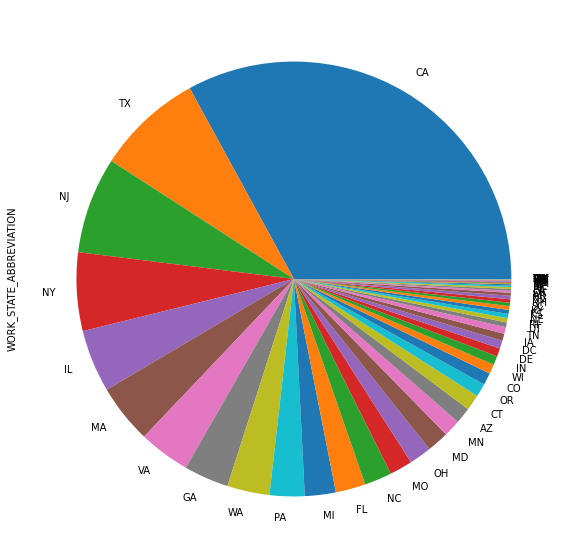

In [23]:
plot1 = statecount.plot.pie(y='States', figsize=(10,10))

It's clear that California has the largest job market by far, followed by Texas, New Jersey, and New York.

## Which cities have the biggest job market?

In [24]:
citycount = citystate_df['WORK_CITY'].value_counts()

citycount.head(20)

MOUNTAIN VIEW    6695
SAN FRANCISCO    6251
NEW YORK         5380
SAN DIEGO        2909
SAN JOSE         2826
SANTA CLARA      2665
SUNNYVALE        2164
PALO ALTO        2061
ATLANTA          2055
CHICAGO          1888
HOUSTON          1812
IRVING           1396
AUSTIN           1336
DALLAS           1322
JERSEY CITY      1218
MENLO PARK       1167
BOSTON           1116
REDMOND          1115
BELLEVUE         1093
SEATTLE          1005
Name: WORK_CITY, dtype: int64

20 seemed a reasonable amount of cities to look at initially. Initial results make sense - Mountain View and San Francisco are tech hot spots, and New York is a huge city. Following cities are also major metropolitan areas, or smaller cities within a larger metropolitan area.

In [28]:
citycount.type()

AttributeError: 'Series' object has no attribute 'type'